In [25]:
import warnings
import joblib
#import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

In [26]:
train_data = 'C:/YunTech/dataset/adult/adult.data'
columns=['age', 'workclass', 'fnlgwt', 'education', 'educationnum', 'marital-status', 'occupation', 'relationship', 
         'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income']
adult_data = pd.read_csv(train_data, names = columns)
adult_data.head()

,age,workclass,fnlgwt,education,educationnum,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
adult_data.drop('fnlgwt', axis = 1, inplace =True)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
for columns in adult_data:
    if adult_data[columns].dtypes == object:
        adult_data[columns] = le.fit_transform(adult_data[columns])

In [32]:
y = adult_data["income"]
X = adult_data.drop(["income"], axis=1)

In [33]:
# train CART model
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)


In [34]:
#y_pred for Confusion Matrix  :
y_pred = cart_model.predict(X)

In [35]:
#y_prob for AUC:
y_prob = cart_model.predict_proba(X)[:, 1]

In [36]:
# Confusion matrix
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     24720
           1       0.98      0.92      0.95      7841

    accuracy                           0.98     32561
   macro avg       0.98      0.96      0.97     32561
weighted avg       0.98      0.98      0.98     32561



In [37]:
# AUC
roc_auc_score(y, y_prob)

0.9982769832995511

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=85)

In [39]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [40]:
# Train Error
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17302
           1       0.98      0.93      0.96      5490

    accuracy                           0.98     22792
   macro avg       0.98      0.96      0.97     22792
weighted avg       0.98      0.98      0.98     22792



In [41]:
roc_auc_score(y_train, y_prob)

0.9987445148322978

In [42]:
# Test Error
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7418
           1       0.61      0.62      0.61      2351

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [43]:
roc_auc_score(y_test, y_prob)

0.7632571237677124

In [44]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

In [45]:
cv_results = cross_validate(cart_model,
                            X, y,
                            cv=10,
                            scoring=["accuracy", "f1", "roc_auc"])

In [46]:
cv_results['test_accuracy'].mean()

0.8171125657155747

In [47]:
cv_results['test_f1'].mean()

0.6146101887999397

In [48]:
cv_results['test_roc_auc'].mean()

0.7661424507190793

In [49]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [50]:
# Hyperparameter set to search:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [51]:
# GridSearchCV
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [52]:
# Best hyper parameter values:
cart_best_grid.best_params_

{'max_depth': 10, 'min_samples_split': 12}

In [53]:
# Best score:
cart_best_grid.best_score_

0.8556248870620129

In [54]:
random = X.sample(1, random_state=45)
print(random)

      age  workclass  education  educationnum  marital-status  occupation  \
6299   43          4         12            14               2          10   

      relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
6299             0     4       1             0             0              40   

      country  
6299       39  


In [55]:
cart_best_grid.predict(random)

array([1])

In [56]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_,
                                    random_state=17).fit(X, y)

In [57]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [58]:
# Another way to assign the best parameters to the model:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

In [59]:
# CV error of final model:
cv_results = cross_validate(cart_final,
                            X, y,
                            cv=10,
                            scoring=["accuracy", "f1", "roc_auc"])

In [60]:
cv_results['test_accuracy'].mean()

0.856177792077393

In [61]:
cv_results['test_f1'].mean()

0.6660706695785723

In [62]:
cv_results['test_roc_auc'].mean()

0.901462179280685

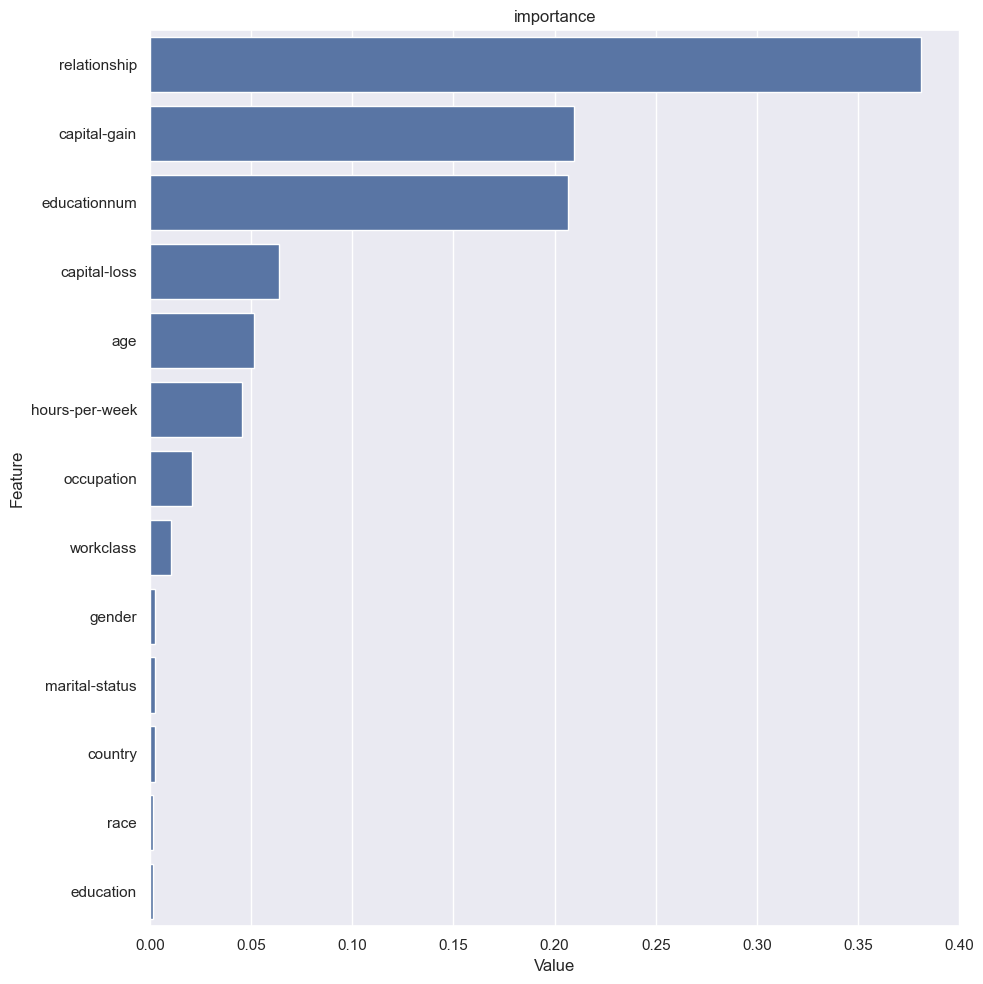

In [76]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('importance')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(cart_final, X, 15)

In [67]:
train_score, test_score = validation_curve(
    cart_final, X=X, y=y,
    param_name='max_depth',
    param_range=range(1, 11),
    scoring="roc_auc",
    cv=10)

In [68]:
mean_train_score = np.mean(train_score, axis=1)

In [69]:
mean_test_score = np.mean(test_score, axis=1)

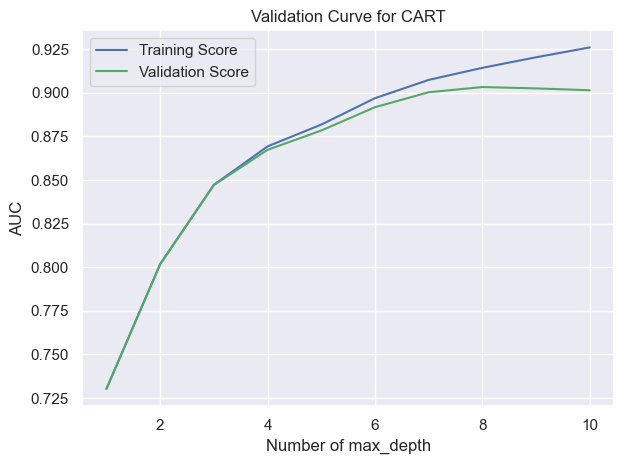

In [70]:
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')
plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [71]:
tree_rules = export_text(cart_model, feature_names=list(X.columns))
print(tree_rules)

|--- relationship <= 0.50
|   |--- educationnum <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- educationnum <= 8.50
|   |   |   |   |--- capital-loss <= 1791.50
|   |   |   |   |   |--- age <= 36.50
|   |   |   |   |   |   |--- hours-per-week <= 49.00
|   |   |   |   |   |   |   |--- educationnum <= 7.50
|   |   |   |   |   |   |   |   |--- country <= 1.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- country >  1.00
|   |   |   |   |   |   |   |   |   |--- education <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- education >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- educationnum >  7.50
|   |   |   |   |   |   |   |   |--- occupation <= 11.50
|   |   |   |   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |  